In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

# Import dataset

In [2]:
# Chargement API KEYS
load_dotenv()

API_KEY_S3 = os.environ["API_KEY_S3"]
API_SECRET_KEY_S3 = os.environ["API_SECRET_KEY_S3"]

bucket_name = "renergies99-bucket"
s3_prefix = "public"

In [5]:
df = pd.read_csv(
    "s3://renergies99-bucket/public/prod/eCO2mix_RTE_Annuel-Definitif.csv",
    index_col=0,
    storage_options={
        "key": API_KEY_S3,
        "secret": API_SECRET_KEY_S3,
    }
)

In [6]:
df.head()

,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
Périmètre,,,,,,,,,,,,,,,,,,,,,
France,Données définitives,2012-01-01,00:00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,00:30:00,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,01:00:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,01:30:00,56075.0,56000.0,55400.0,491.0,25.0,3832.0,51950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,02:00:00,55532.0,56000.0,55000.0,492.0,25.0,3839.0,51625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(243374, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243374 entries, France to RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises.
Data columns (total 39 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Nature                                243360 non-null  object 
 1   Date                                  243360 non-null  object 
 2   Heures                                243360 non-null  object 
 3   Consommation                          243333 non-null  float64
 4   Prévision J-1                         243360 non-null  float64
 5   Prévision J                           243360 non-null  float64
 6   Fioul                                 243330 non-null  float64
 7   Charbon                               243330 non-null  float64
 8   Gaz                                   243330 non-nul

In [9]:
df.describe(include="all")

,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
count,243360,243360,243360,243333.000000,243360.000000,243360.000000,243330.000000,243330.000000,243330.000000,243330.000000,...,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,225761.000000,85505.000000,85505.000000,85505.00000,85505.000000
unique,3,5070,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Données définitives,2012-01-01,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,210384,48,5070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,52842.921326,52458.559689,52388.128217,238.930444,727.366412,3238.702433,42300.981301,...,4614.380978,1808.961933,683.634906,477.569771,287.393239,274.354902,-2.232712,1.003766,3883.21042,258.083796
std,NaN,NaN,NaN,11777.879399,11762.361910,11729.765374,266.802648,1054.230237,2466.711876,7702.082871,...,1528.944204,1116.678503,775.166737,68.327198,78.230395,63.500172,7.672021,5.144500,3914.01817,357.778723
min,NaN,NaN,NaN,29004.000000,27500.000000,0.000000,0.000000,0.000000,234.000000,19164.000000,...,1211.000000,46.000000,0.000000,65.000000,57.000000,0.000000,-126.000000,0.000000,0.00000,0.000000
25%,NaN,NaN,NaN,43932.000000,43600.000000,43600.000000,85.000000,13.000000,914.000000,37746.000000,...,3334.000000,962.000000,55.000000,437.000000,236.000000,218.000000,0.000000,0.000000,885.00000,0.000000
50%,NaN,NaN,NaN,51031.000000,50600.000000,50600.000000,136.000000,60.000000,2741.000000,41873.000000,...,4720.000000,1598.000000,390.000000,486.000000,290.000000,295.000000,0.000000,0.000000,2747.00000,95.000000
75%,NaN,NaN,NaN,60624.000000,60200.000000,60000.000000,317.000000,1119.000000,4828.000000,47088.000000,...,5848.000000,2422.000000,1087.000000,527.000000,339.000000,332.000000,0.000000,0.000000,5784.00000,393.000000


# Vue générale

In [10]:
# Nombre de  valeurs manquantes
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

Nature                                      14
Date                                        14
Heures                                      14
Consommation                                41
Prévision J-1                               14
Prévision J                                 14
Fioul                                       44
Charbon                                     44
Gaz                                         44
Nucléaire                                   44
Eolien                                      44
Solaire                                     44
Hydraulique                                 44
Pompage                                     44
Bioénergies                                 44
Ech. physiques                              44
Taux de Co2                                 44
Ech. comm. Angleterre                      646
Ech. comm. Espagne                          22
Ech. comm. Italie                           32
Ech. comm. Suisse                           22
Ech. comm. Al

In [11]:
# Pourcentage de valeurs manquantes
valeurs_manquantes_pourcent = (df.isna().sum() / df.shape[0]) * 100
valeurs_manquantes_pourcent

Nature                                   0.005752
Date                                     0.005752
Heures                                   0.005752
Consommation                             0.016846
Prévision J-1                            0.005752
Prévision J                              0.005752
Fioul                                    0.018079
Charbon                                  0.018079
Gaz                                      0.018079
Nucléaire                                0.018079
Eolien                                   0.018079
Solaire                                  0.018079
Hydraulique                              0.018079
Pompage                                  0.018079
Bioénergies                              0.018079
Ech. physiques                           0.018079
Taux de Co2                              0.018079
Ech. comm. Angleterre                    0.265435
Ech. comm. Espagne                       0.009040
Ech. comm. Italie                        0.013148


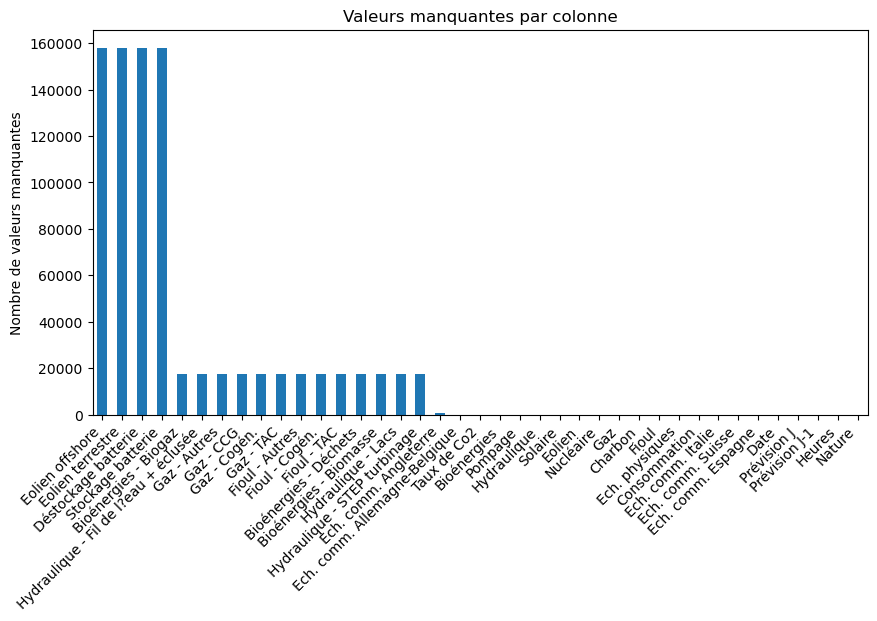

In [12]:
valeurs_manquantes_graph = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Prise en charge si valeurs manquetes à 0
if valeurs_manquantes_graph.empty:
    ax = plt.gca()
    ax.text(0.5, 0.5, "Aucune valeur manquante",
            ha="center", va="center", fontsize=12)
    ax.axis("off")
else:
    valeurs_manquantes_graph.plot(kind="bar")
    plt.title("Valeurs manquantes par colonne")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.xticks(rotation=45, ha="right")

plt.show()

In [13]:
# Vérification valeurs numériques float uniques
numeric_float = df.select_dtypes('float64')

for col in numeric_float.columns:
  print(f"Colonne {col} : ", numeric_float[col].nunique())

Colonne Consommation :  49871
Colonne Prévision J-1 :  1368
Colonne Prévision J :  2461
Colonne Fioul :  2454
Colonne Charbon :  5451
Colonne Gaz :  9507
Colonne Nucléaire :  36554
Colonne Eolien :  15825
Colonne Solaire :  12939
Colonne Hydraulique :  14049
Colonne Pompage :  3834
Colonne Bioénergies :  976
Colonne Ech. physiques :  25363
Colonne Taux de Co2 :  135
Colonne Ech. comm. Angleterre :  6879
Colonne Ech. comm. Espagne :  6542
Colonne Ech. comm. Italie :  5566
Colonne Ech. comm. Suisse :  5091
Colonne Ech. comm. Allemagne-Belgique :  16068
Colonne Fioul - TAC :  1253
Colonne Fioul - Cogén. :  310
Colonne Fioul - Autres :  1611
Colonne Gaz - TAC :  766
Colonne Gaz - Cogén. :  3170
Colonne Gaz - CCG :  6392
Colonne Gaz - Autres :  1733
Colonne Hydraulique - Fil de l?eau + éclusée :  6826
Colonne Hydraulique - Lacs :  6167
Colonne Hydraulique - STEP turbinage :  3923
Colonne Bioénergies - Déchets :  447
Colonne Bioénergies - Biomasse :  464
Colonne Bioénergies - Biogaz :  294
C

In [14]:
# Vérification valeurs numériques int uniques
numeric_int = df.select_dtypes('int64')

for col in numeric_int.columns:
  print(f"Colonne {col} : ", numeric_int[col].nunique())

In [15]:
# Vérification valeurs non numériques float uniques
non_numeric = df.select_dtypes('object')

for col in non_numeric.columns:
  print(f"Colonne {col} : ", non_numeric[col].nunique())

Colonne Nature :  3
Colonne Date :  5070
Colonne Heures :  48


# Cleaning

In [16]:
df.replace(["ND", "n.d", "Na", "na", "-", ""], np.nan, inplace=True)

In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [18]:
df.shape

(243374, 39)

In [19]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 243374 entries, France to RTE ne pourra être tenu responsable de l'usage qui pourrait être fait des données mises à disposition, ni en cas de prévisions qui se révèleraient imprécises.
Data columns (total 39 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   nature                                243360 non-null  object 
 1   date                                  243360 non-null  object 
 2   heures                                243360 non-null  object 
 3   consommation                          243333 non-null  float64
 4   prévision_j-1                         243360 non-null  float64
 5   prévision_j                           243360 non-null  float64
 6   fioul                                 243330 non-null  float64
 7   charbon                               243330 non-null  float64
 8   gaz                                   243330 non-nul

In [20]:
df.head()

,nature,date,heures,consommation,prévision_j-1,prévision_j,fioul,charbon,gaz,nucléaire,...,hydraulique_-_fil_de_l?eau_+_éclusée,hydraulique_-_lacs,hydraulique_-_step_turbinage,bioénergies_-_déchets,bioénergies_-_biomasse,bioénergies_-_biogaz,stockage_batterie,déstockage_batterie,eolien_terrestre,eolien_offshore
Périmètre,,,,,,,,,,,,,,,,,,,,,
France,Données définitives,2012-01-01,00:00:00,58315.0,58200.0,58200.0,492.0,25.0,3816.0,52697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,00:30:00,58315.0,57200.0,56900.0,492.0,25.0,3816.0,52697.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,01:00:00,56231.0,55200.0,55100.0,492.0,25.0,3834.0,51747.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,01:30:00,56075.0,56000.0,55400.0,491.0,25.0,3832.0,51950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,Données définitives,2012-01-01,02:00:00,55532.0,56000.0,55000.0,492.0,25.0,3839.0,51625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Écriture directe du DataFrame cleaned sur S3
df.to_csv(
    "s3://renergies99-bucket/public/prod/eCO2mix_RTE_Annuel-Definitif_cleaned.csv",
    index=False,
    storage_options={
        "key": API_KEY_S3,
        "secret": API_SECRET_KEY_S3,
    },
)